# Principal Component Analysis

In [72]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## PCA for all variables of interest over time

In [96]:
# read in the data 
data = pd.read_csv('Datasets/combined_data.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer,YearMonth
0,1,054.0 056.0,NaN,NaN,8.414828,33.770571,NaN,NaN,NaN,NaN,...,60,38.833333,-124.083333,17958.0,18.0,NaN,NaN,NaN,NaN,1949-03
1,2,052.0 075.0,NaN,NaN,6.612188,33.811156,NaN,NaN,NaN,NaN,...,60,38.583333,-125.800000,17958.0,5.0,NaN,NaN,NaN,NaN,1949-03
2,3,051.0 085.0,NaN,NaN,7.291935,33.505419,NaN,NaN,NaN,NaN,...,61,38.475000,-126.666666,17959.0,5.0,NaN,NaN,NaN,NaN,1949-03
3,4,050.0 095.0,NaN,NaN,7.437742,33.563267,NaN,NaN,NaN,NaN,...,61,38.333333,-127.516666,17959.0,8.0,NaN,NaN,NaN,NaN,1949-03
4,5,050.0 104.0,NaN,NaN,8.095385,33.438200,NaN,NaN,NaN,NaN,...,61,38.233333,-128.366666,17959.0,13.0,NaN,NaN,NaN,NaN,1949-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35639,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8,2021-05
35640,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4,2021-05
35641,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9,2021-05
35642,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6,2021-05


In [97]:
# data_plot = data[['ChlorA', 'T_degC', 'Salnty', 'O2ml_L', 'PO4uM', 'SiO3uM', 'NO3uM', 'Wave_Ht']]

# plt.figure(figsize=(10, 8))

# for col in data_plot.columns:
#     plt.plot(data_plot.index, data_plot[col], label=col)

# #plt.title("Variables over time")
# plt.xlabel("Time")
# plt.ylabel("Values")
# plt.legend()
# plt.grid(True)
# plt.show()

In [98]:
# drop some of the columns
data = data[['Julian_Date', 'ChlorA', 'T_degC', 'O2ml_L', 'PO4uM', 'SiO3uM', 'NO3uM', 'Lat_Dec', 'Lon_Dec', 'Wave_Ht', 'Depthm']]
data

,Julian_Date,ChlorA,T_degC,O2ml_L,PO4uM,SiO3uM,NO3uM,Lat_Dec,Lon_Dec,Wave_Ht,Depthm
0,17958.0,NaN,8.414828,NaN,NaN,NaN,NaN,38.833333,-124.083333,NaN,246.689655
1,17958.0,NaN,6.612188,NaN,NaN,NaN,NaN,38.583333,-125.800000,NaN,385.750000
2,17959.0,NaN,7.291935,NaN,NaN,NaN,NaN,38.475000,-126.666666,NaN,339.935484
3,17959.0,NaN,7.437742,NaN,NaN,NaN,NaN,38.333333,-127.516666,NaN,309.709677
4,17959.0,NaN,8.095385,NaN,NaN,NaN,NaN,38.233333,-128.366666,NaN,208.038462
...,...,...,...,...,...,...,...,...,...,...,...
35639,44321.0,0.441000,10.189478,3.393522,1.753478,27.994783,21.642174,31.846300,-119.565900,2.0,171.956522
35640,44322.0,0.296533,10.864045,3.831318,1.485909,23.364091,17.431364,31.515130,-120.240520,NaN,170.590909
35641,44322.0,0.214667,10.590261,3.374952,1.610000,27.298182,19.575000,31.176820,-120.920900,NaN,164.739130
35642,44322.0,0.235235,10.446458,3.724625,1.532917,26.943333,18.801250,30.846380,-121.589030,3.0,162.541667


In [99]:
# Aggregate data to ensure uniqueness
data = data.dropna()
data = data.groupby('Julian_Date').mean()
data

,ChlorA,T_degC,O2ml_L,PO4uM,SiO3uM,NO3uM,Lat_Dec,Lon_Dec,Wave_Ht,Depthm
Julian_Date,,,,,,,,,,
26737.0,9.499583,16.959286,5.611714,1.273000,18.822857,0.285000,31.314999,-114.425000,6.000000,14.187500
28468.0,0.795373,12.533327,3.619496,1.409068,20.759594,15.922569,28.833889,-116.849444,2.666667,170.413306
28469.0,0.652000,12.606803,3.673024,1.185872,20.159319,14.606153,30.097499,-116.091667,3.000000,156.254608
28470.0,0.341000,12.051613,3.738387,1.126452,23.977419,14.341935,29.533333,-118.033333,2.000000,172.064516
28471.0,0.115750,11.426935,3.585323,1.210161,24.362903,16.370968,32.012499,-117.628333,3.500000,171.870968
...,...,...,...,...,...,...,...,...,...,...
44325.0,0.802039,11.851773,3.803602,1.536471,22.479194,17.903716,33.656523,-118.582750,1.500000,108.288952
44326.0,0.377198,10.000938,3.151137,1.898645,30.983412,22.889900,33.046817,-120.235173,6.333333,168.986667
44327.0,0.268355,10.633449,4.104231,1.395966,23.409716,16.341799,32.980480,-123.565595,6.000000,160.294384


In [100]:
### # Apply PCA on the data considering m=12 (dimensions) and n=100 observations
pca = PCA()
PCs = pca.fit_transform(data)  

In [101]:
PCs.shape

(2330, 10)

[9.88974980e-01 8.20395760e-03 1.27209975e-03 6.58794866e-04
 3.99470149e-04 2.84084901e-04 1.29593210e-04 6.97232552e-05
 6.51598980e-06 7.79971701e-07]
[[-4.47994437e-03 -1.13365882e-02 -4.97995291e-03  2.33960507e-03
   8.28775169e-02  3.81049239e-02 -4.73116311e-03 -8.53869752e-03
   5.86093232e-03  9.95676065e-01]
 [ 8.85808033e-03 -1.55328404e-01 -7.44923147e-02  4.24868321e-02
   7.56786626e-01  6.17067467e-01  7.87522465e-02  3.02726608e-02
   6.48790363e-03 -8.82138637e-02]
 [-6.76083090e-02 -8.86656819e-02  1.77885165e-02 -2.36089914e-03
  -3.79213640e-02  4.35019541e-02 -1.73946136e-02 -4.92550824e-01
   8.60769041e-01 -9.10104910e-03]
 [-5.21084050e-02  1.32647294e-01 -4.77121026e-02  1.18240501e-03
   4.19692472e-02 -1.50832775e-02 -4.00704009e-01  7.81293492e-01
   4.52149705e-01  2.52902255e-04]
 [ 2.92897807e-01 -6.87906083e-02  8.38389187e-02 -9.69689095e-03
   2.05013181e-01 -3.75979624e-01  7.67814731e-01  2.84302359e-01
   2.20426430e-01  3.08989209e-03]
 [-1.713669

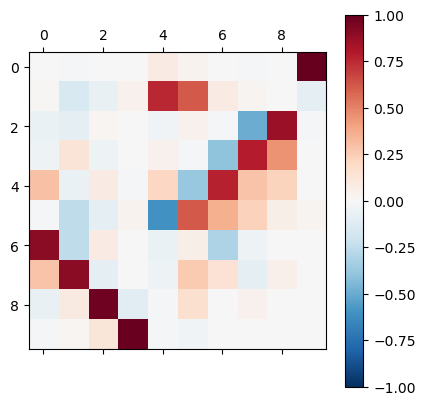

In [102]:
FracVar = pca.explained_variance_ratio_  # calculate fraction of variance explained by each mode
print(FracVar)
eigvecs = pca.components_
print(eigvecs)
print(eigvecs.shape)
plt.colorbar(plt.matshow(eigvecs, cmap="RdBu_r", vmin=-1, vmax=1))

/var/folders/bk/6zsdr_0d5tbb4ggk0ngc_l940000gn/T/ipykernel_3362/2134956138.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


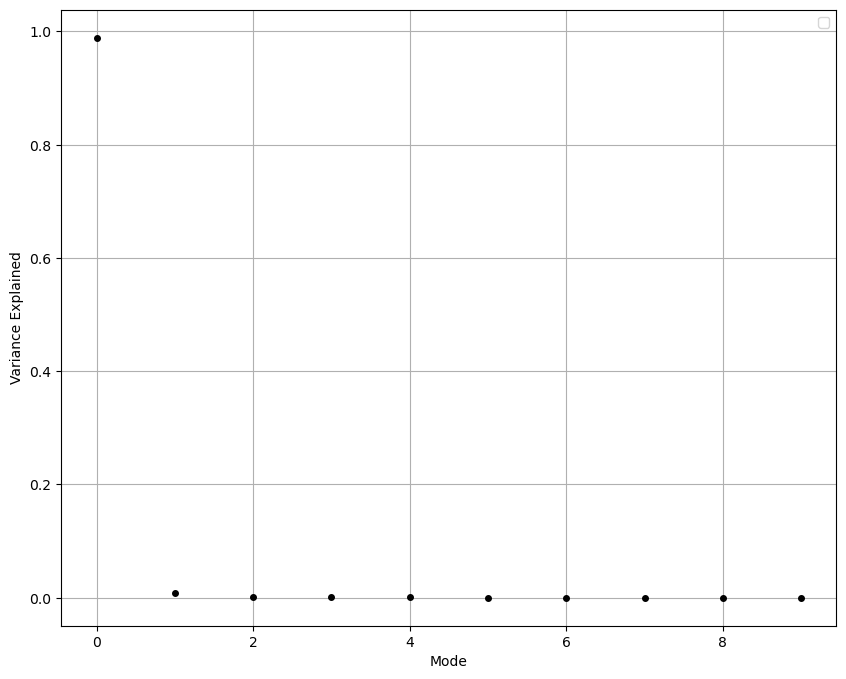

In [103]:
plt.figure(figsize=(10, 8))

plt.plot(fraction_variance, "ko", ms=4)

#plt.title("Variables over time")
plt.xlabel("Mode")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid(True)
plt.show()

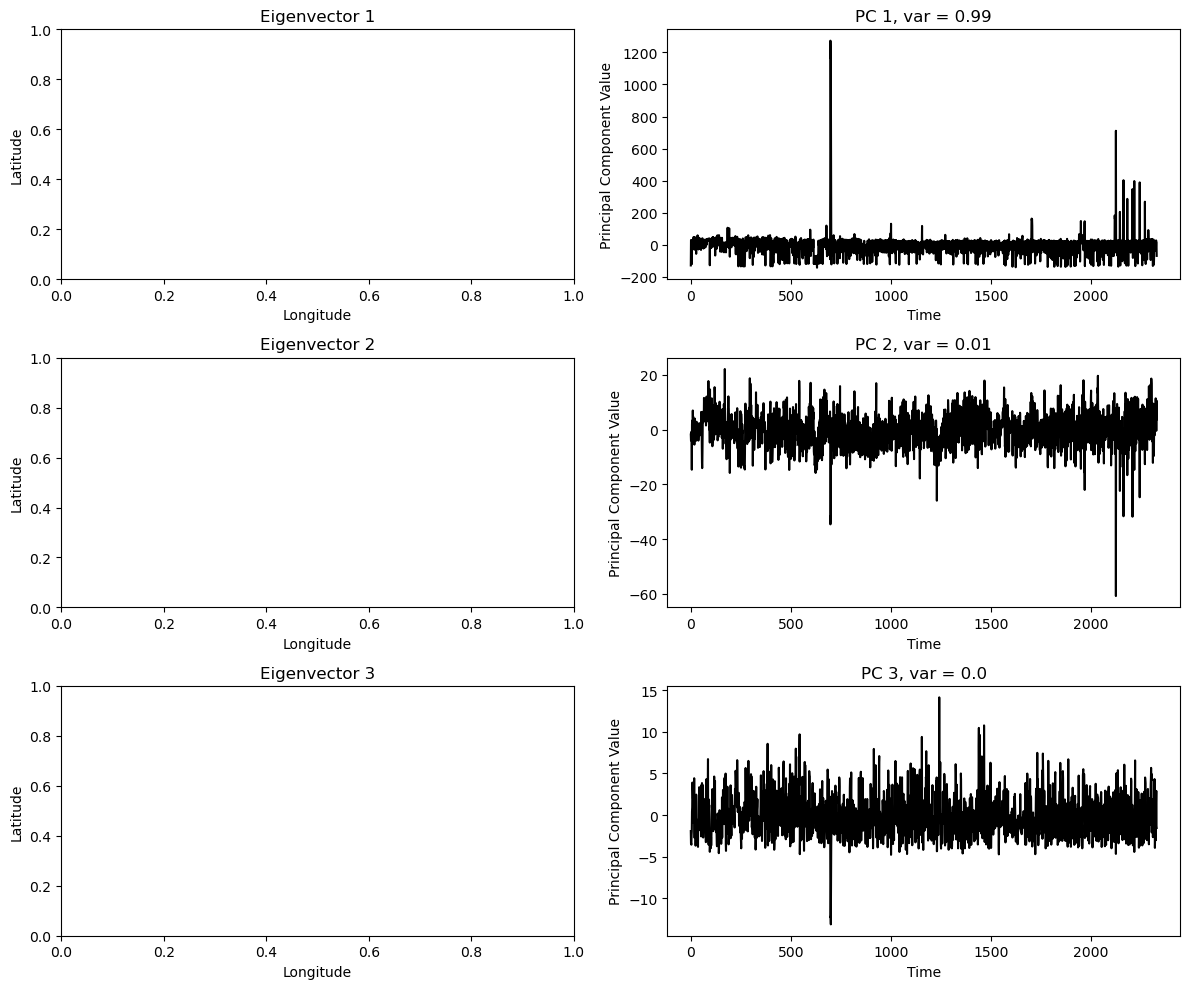

In [109]:
plt.figure(figsize=(12, 10))  # Adjust the size as needed

for i in range(3):
    plt.subplot(3, 2, i * 2 + 1)
    #plt.scatter(c=eigvecs[i], s=200, cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title(f"Eigenvector {i + 1}")
    #plt.colorbar(label='Eigenvector Value')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.subplot(3, 2, i * 2 + 2)
    plt.plot(PCs[:, i], c="k")
    plt.title(f"PC {i + 1}, var = {round(fraction_variance[i], 2)}")
    plt.xlabel("Time")
    plt.ylabel("Principal Component Value")

plt.tight_layout()
plt.show()

## Temperature per station over time

In [213]:
# read in the data 
data = pd.read_csv('Datasets/combined_data.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer,YearMonth
0,1,054.0 056.0,NaN,NaN,8.414828,33.770571,NaN,NaN,NaN,NaN,...,60,38.833333,-124.083333,17958.0,18.0,NaN,NaN,NaN,NaN,1949-03
1,2,052.0 075.0,NaN,NaN,6.612188,33.811156,NaN,NaN,NaN,NaN,...,60,38.583333,-125.800000,17958.0,5.0,NaN,NaN,NaN,NaN,1949-03
2,3,051.0 085.0,NaN,NaN,7.291935,33.505419,NaN,NaN,NaN,NaN,...,61,38.475000,-126.666666,17959.0,5.0,NaN,NaN,NaN,NaN,1949-03
3,4,050.0 095.0,NaN,NaN,7.437742,33.563267,NaN,NaN,NaN,NaN,...,61,38.333333,-127.516666,17959.0,8.0,NaN,NaN,NaN,NaN,1949-03
4,5,050.0 104.0,NaN,NaN,8.095385,33.438200,NaN,NaN,NaN,NaN,...,61,38.233333,-128.366666,17959.0,13.0,NaN,NaN,NaN,NaN,1949-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35639,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8,2021-05
35640,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4,2021-05
35641,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9,2021-05
35642,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6,2021-05


In [214]:
# filter out other data
data = data[['Julian_Date', 'Sta_ID', 'T_degC', 'Lat_Dec', 'Lon_Dec']]
data = data.dropna()
data

,Julian_Date,Sta_ID,T_degC,Lat_Dec,Lon_Dec
0,17958.0,054.0 056.0,8.414828,38.833333,-124.083333
1,17958.0,052.0 075.0,6.612188,38.583333,-125.800000
2,17959.0,051.0 085.0,7.291935,38.475000,-126.666666
3,17959.0,050.0 095.0,7.437742,38.333333,-127.516666
4,17959.0,050.0 104.0,8.095385,38.233333,-128.366666
...,...,...,...,...,...
35639,44321.0,093.3 060.0,10.189478,31.846300,-119.565900
35640,44322.0,093.3 070.0,10.864045,31.515130,-120.240520
35641,44322.0,093.3 080.0,10.590261,31.176820,-120.920900
35642,44322.0,093.3 090.0,10.446458,30.846380,-121.589030


In [215]:
# filter Sta_ID
# data['Sta_ID'] = data['Sta_ID'].str.split().str[1]
data = data.dropna()
data

,Julian_Date,Sta_ID,T_degC,Lat_Dec,Lon_Dec
0,17958.0,054.0 056.0,8.414828,38.833333,-124.083333
1,17958.0,052.0 075.0,6.612188,38.583333,-125.800000
2,17959.0,051.0 085.0,7.291935,38.475000,-126.666666
3,17959.0,050.0 095.0,7.437742,38.333333,-127.516666
4,17959.0,050.0 104.0,8.095385,38.233333,-128.366666
...,...,...,...,...,...
35639,44321.0,093.3 060.0,10.189478,31.846300,-119.565900
35640,44322.0,093.3 070.0,10.864045,31.515130,-120.240520
35641,44322.0,093.3 080.0,10.590261,31.176820,-120.920900
35642,44322.0,093.3 090.0,10.446458,30.846380,-121.589030


In [216]:
# Function to round the second part of Sta_ID to the nearest 5
def round_sta_id(value):
    parts = value.split()  # Split the Sta_ID into components
    rounded_parts = [
        f"{float(part):.1f}" if i == 0 else f"{10 * round(float(part) / 10):.1f}"
        for i, part in enumerate(parts)
    ]
    return " ".join(rounded_parts)

# Apply the rounding function to the Sta_ID column
data['Sta_ID'] = data['Sta_ID'].apply(round_sta_id)

# Display the updated DataFrame
data

,Julian_Date,Sta_ID,T_degC,Lat_Dec,Lon_Dec
0,17958.0,54.0 60.0,8.414828,38.833333,-124.083333
1,17958.0,52.0 80.0,6.612188,38.583333,-125.800000
2,17959.0,51.0 80.0,7.291935,38.475000,-126.666666
3,17959.0,50.0 100.0,7.437742,38.333333,-127.516666
4,17959.0,50.0 100.0,8.095385,38.233333,-128.366666
...,...,...,...,...,...
35639,44321.0,93.3 60.0,10.189478,31.846300,-119.565900
35640,44322.0,93.3 70.0,10.864045,31.515130,-120.240520
35641,44322.0,93.3 80.0,10.590261,31.176820,-120.920900
35642,44322.0,93.3 90.0,10.446458,30.846380,-121.589030


In [217]:
unique_stations = data['Sta_ID'].nunique()
unique_stations

1330

In [218]:
# # round to nearest station
# data['Sta_ID'] = data['Sta_ID'].astype(float)
# data['Sta_ID'] = data['Sta_ID'].apply(lambda x: round(x / 10) * 10)
# data

In [219]:
# Define the grouping logic
grouped_dates = []
current_group = []

for idx, date in enumerate(data['Julian_Date']):
    if not current_group or (date - current_group[0]) <= 23:
        current_group.append(date)
    else:
        grouped_dates.extend([pd.Series(current_group).median()] * len(current_group))
        current_group = [date]

# Add the last group
if current_group:
    grouped_dates.extend([pd.Series(current_group).median()] * len(current_group))

# Replace the Julian_Date column with the grouped dates
data['Julian_Date'] = grouped_dates

# Drop duplicates if needed to keep unique Julian_Date aggregates
data = data.drop_duplicates().reset_index(drop=True)

# Display the result
data

,Julian_Date,Sta_ID,T_degC,Lat_Dec,Lon_Dec
0,17963.0,54.0 60.0,8.414828,38.833333,-124.083333
1,17963.0,52.0 80.0,6.612188,38.583333,-125.800000
2,17963.0,51.0 80.0,7.291935,38.475000,-126.666666
3,17963.0,50.0 100.0,7.437742,38.333333,-127.516666
4,17963.0,50.0 100.0,8.095385,38.233333,-128.366666
...,...,...,...,...,...
35351,44325.0,93.3 60.0,10.189478,31.846300,-119.565900
35352,44325.0,93.3 70.0,10.864045,31.515130,-120.240520
35353,44325.0,93.3 80.0,10.590261,31.176820,-120.920900
35354,44325.0,93.3 90.0,10.446458,30.846380,-121.589030


In [220]:
data = data.groupby(['Julian_Date', 'Sta_ID'], as_index=False)[['T_degC', 'Lat_Dec', 'Lon_Dec']].mean()
data

,Julian_Date,Sta_ID,T_degC,Lat_Dec,Lon_Dec
0,17963.0,101.0 30.0,9.860370,31.366666,-116.925000
1,17963.0,101.0 40.0,9.117000,31.008333,-117.500000
2,17963.0,102.0 100.0,9.992000,28.850000,-121.316666
3,17963.0,102.0 50.0,9.211562,30.675000,-118.508333
4,17963.0,102.0 60.0,8.292813,30.250000,-118.833333
...,...,...,...,...,...
23545,44325.0,93.3 50.0,10.021190,32.179380,-118.894120
23546,44325.0,93.3 60.0,10.199080,31.929840,-119.399015
23547,44325.0,93.3 70.0,10.864045,31.515130,-120.240520
23548,44325.0,93.3 80.0,10.590261,31.176820,-120.920900


In [221]:
unique_stations = data['Sta_ID'].nunique()
unique_stations

1330

In [222]:
# # save Lat and Lon
# stations = {}
# for sta_id, group in data.groupby('Sta_ID'):
#     stations[sta_id] = group[['Lat_Dec', 'Lon_Dec']]

# stations

In [223]:
pivoted_df = data.pivot(index='Julian_Date', columns='Sta_ID', values='T_degC')
pivoted_df

Sta_ID,1.0 170.0,1.0 260.0,10.0 10.0,10.0 100.0,10.0 20.0,10.0 30.0,10.0 40.0,10.0 50.0,10.0 60.0,10.0 70.0,...,99.0 40.0,99.0 50.0,99.0 60.0,99.0 70.0,99.0 90.0,99.5 40.0,99.5 60.0,99.7 40.0,99.7 50.0,99.7 60.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
17963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18025.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
non_nan_counts = pivoted_df.count()

max_non_nan_column = non_nan_counts.idxmax()
max_non_nan_count = non_nan_counts.max()

print(f"Column with most non-NaN values: {max_non_nan_column}")
print(f"Number of non-NaN values: {max_non_nan_count}")


Column with most non-NaN values: 90.0 40.0
Number of non-NaN values: 298


In [225]:
column = pivoted_df[max_non_nan_column]
column 

Julian_Date
17963.0          NaN
17994.0          NaN
18025.5          NaN
18052.0          NaN
18087.0          NaN
             ...    
40759.0    10.987350
40840.0    11.165115
40943.0    10.633113
40999.0    10.090447
44325.0    10.728425
Name: 90.0 40.0, Length: 389, dtype: float64

In [226]:
column = column.dropna()
column

Julian_Date
18303.0     8.270000
18359.0     8.303933
18393.0     7.656058
18429.0     8.309081
18459.0     8.646351
             ...    
40759.0    10.987350
40840.0    11.165115
40943.0    10.633113
40999.0    10.090447
44325.0    10.728425
Name: 90.0 40.0, Length: 298, dtype: float64

In [256]:
# Calculate the number of NaN values in each column (station)
nan_counts = pivoted_df.isna().sum()

# Sort the stations by the number of NaN values in descending order
stations_with_most_nans = nan_counts.sort_values(ascending=False)

# Drop the stations with the most NaN values
pivoted_df_cleaned = pivoted_df.drop(columns=stations_with_most_nans.index[:1295])  # Adjust the number (5) as needed

# Display the cleaned dataframe
print(pivoted_df_cleaned)


Sta_ID       76.7 50.0  76.7 60.0  80.0 50.0  80.0 60.0  80.0 70.0  80.0 80.0  \
Julian_Date                                                                     
17963.0            NaN        NaN        NaN        NaN        NaN        NaN   
17994.0            NaN        NaN        NaN        NaN        NaN        NaN   
18025.5            NaN        NaN        NaN        NaN        NaN        NaN   
18052.0            NaN        NaN        NaN        NaN        NaN        NaN   
18087.0            NaN        NaN        NaN        NaN        NaN        NaN   
...                ...        ...        ...        ...        ...        ...   
40759.0      11.464038   9.993954  13.668901   9.987192  11.091429  10.539032   
40840.0      11.959439  10.002132  14.386286  10.990417  10.868571  10.872759   
40943.0      11.408550   9.589174  12.965855   9.513615   9.983871  10.214375   
40999.0       9.856472   9.203915  10.576875   9.068853        NaN   9.950968   
44325.0            NaN      

In [257]:
pivoted_df_cleaned = pivoted_df_cleaned.dropna()
pivoted_df_cleaned

Sta_ID,76.7 50.0,76.7 60.0,80.0 50.0,80.0 60.0,80.0 70.0,80.0 80.0,80.0 90.0,81.8 50.0,83.3 40.0,83.3 50.0,...,90.0 70.0,90.0 80.0,90.0 90.0,93.3 30.0,93.3 40.0,93.3 50.0,93.3 60.0,93.3 70.0,93.3 80.0,93.3 90.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
24308.0,9.812857,9.462015,9.637368,9.083262,10.217742,10.823438,11.184375,9.324667,11.259000,11.084167,...,10.718276,11.403226,10.991563,10.410822,10.158750,10.453030,10.075667,9.842414,10.484000,11.062727
25222.0,11.639091,9.888921,11.027367,9.955540,10.548571,10.274955,10.344286,10.856187,12.601944,12.344286,...,10.246429,9.879643,10.703571,10.935000,11.355357,11.280714,10.702357,10.517857,10.807143,11.600000
25404.0,11.488000,9.725714,11.348636,9.829286,11.185714,11.123773,11.240814,10.858323,12.728889,12.003333,...,11.091429,11.699286,11.667143,11.659341,10.135714,9.832143,11.290714,11.588571,11.424286,12.587143
25502.0,11.621333,9.821098,11.342841,9.822630,9.638246,10.258917,11.006319,11.105140,12.663115,13.960000,...,10.194058,11.780267,11.970901,11.714463,11.046235,11.166667,11.012667,11.177333,10.979333,10.668667
28511.5,11.932500,10.729323,12.546190,10.308000,10.096333,9.873871,9.531613,11.086452,13.615556,13.357500,...,10.278065,10.243125,11.008710,11.415720,11.338065,11.415667,10.480000,10.712500,10.848621,11.083871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40202.0,12.885194,10.349461,14.299583,10.550668,10.433548,9.228621,6.835385,10.416111,14.164306,13.386875,...,10.294839,10.587419,10.705700,12.660172,11.137427,10.636129,10.995847,10.659000,10.351333,11.511724
40567.0,11.464182,9.703169,12.576238,9.360321,9.432333,9.217241,6.499423,9.555941,12.838730,11.416842,...,10.355161,10.838667,8.694182,10.859075,10.142797,9.534828,9.895941,10.256552,10.739375,11.379167
40759.0,11.464038,9.993954,13.668901,9.987192,11.091429,10.539032,10.854828,9.346875,14.617222,11.500833,...,10.922500,11.157857,7.436939,12.442523,10.572563,10.120714,10.691875,10.477500,12.254062,11.577879


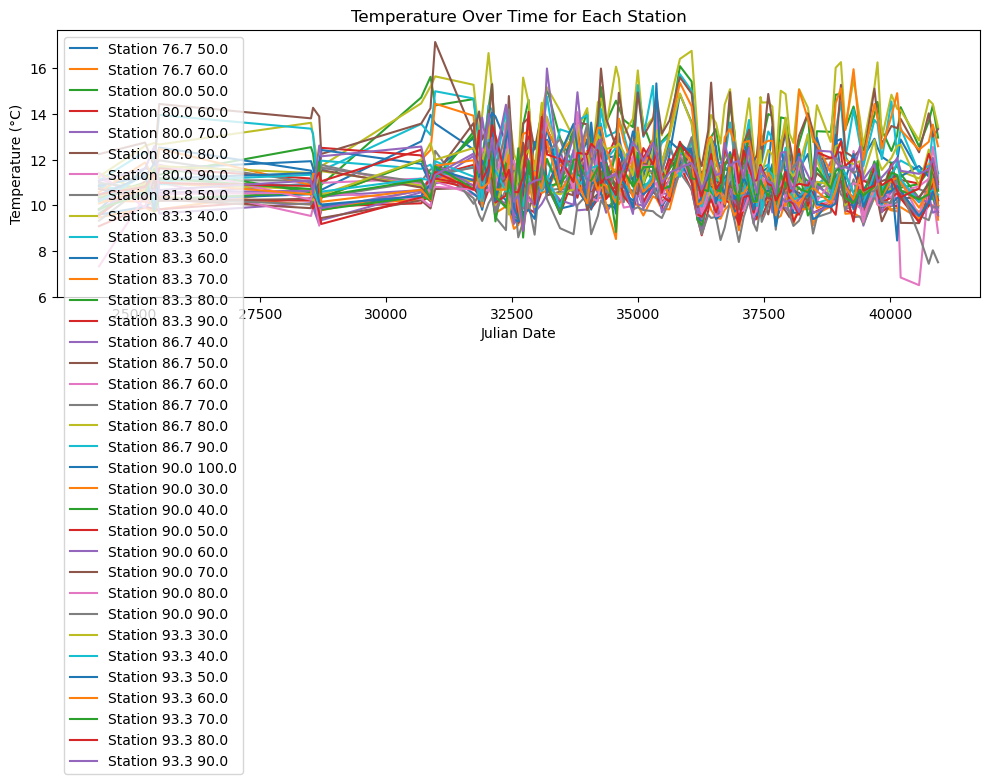

In [258]:
# Assuming the data is in a DataFrame called df
plt.figure(figsize=(10, 6))

# Plot temperature for each station
for station in pivoted_df_cleaned.columns:
    plt.plot(pivoted_df_cleaned.index, pivoted_df_cleaned[station], label=f'Station {station}')

# Adding labels and title
plt.xlabel('Julian Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time for Each Station')

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [259]:
### # Apply PCA on the data considering m=12 (dimensions) and n=100 observations
pca = PCA()
PCs = pca.fit_transform(pivoted_df_cleaned)  

[0.41007939 0.11123759 0.05681472 0.04526329 0.04244699 0.03287321
 0.03070091 0.02865503 0.02714183 0.02164266 0.02155121 0.01947585
 0.01617616 0.0145189  0.01331841 0.01159642 0.01143163 0.01011324
 0.00928895 0.00814994 0.0076964  0.00639819 0.0059057  0.00567136
 0.00474272 0.00447742 0.00432    0.00356847 0.00305908 0.00299474
 0.00241909 0.00215205 0.0017275  0.0014438  0.00094715]
(35, 35)


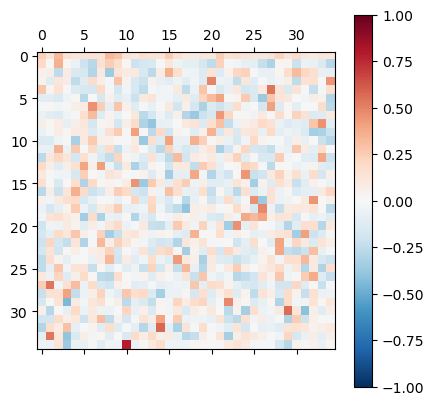

In [260]:
FracVar = pca.explained_variance_ratio_  # calculate fraction of variance explained by each mode
print(FracVar)
eigvecs = pca.components_
#print(eigvecs)
print(eigvecs.shape)
plt.colorbar(plt.matshow(eigvecs, cmap="RdBu_r", vmin=-1, vmax=1))

/var/folders/bk/6zsdr_0d5tbb4ggk0ngc_l940000gn/T/ipykernel_3362/3208488164.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


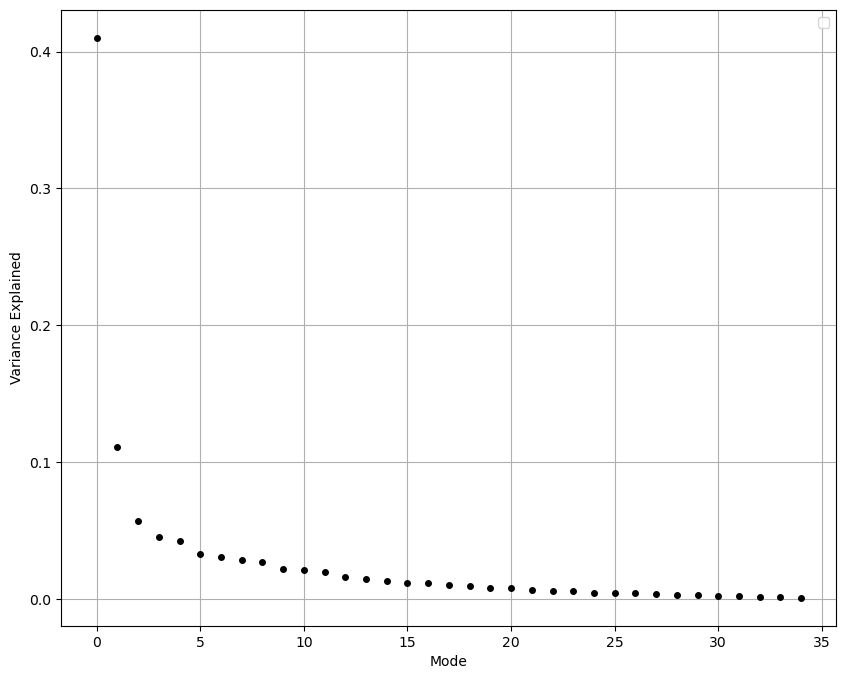

In [261]:
plt.figure(figsize=(10, 8))

plt.plot(FracVar, "ko", ms=4)

#plt.title("Variables over time")
plt.xlabel("Mode")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid(True)
plt.show()

In [262]:
# get the latitude and Longitude of these stations
stations_of_interest = pivoted_df_cleaned.columns

# Filter the DataFrame to get only the rows for the stations of interest
data = data.groupby(['Sta_ID'], as_index=False)[['Lat_Dec', 'Lon_Dec']].mean()
stations_lat_lon = data[data['Sta_ID'].isin(stations_of_interest)]

# Display the result
#print(stations_lat_lon[['Sta_ID', 'Lat_Dec', 'Lon_Dec']])
Lat = stations_lat_lon['Lat_Dec']
Lon = stations_lat_lon['Lon_Dec']
Lat

983     35.046017
985     34.800291
1020    34.437047
1021    34.224690
1022    33.813664
1023    33.481449
1024    33.151469
1038    34.266229
1056    34.184367
1058    33.878750
1059    33.641683
1060    33.242515
1061    32.912258
1062    32.575116
1107    33.668127
1108    33.327509
1109    33.047657
1110    32.654172
1111    32.320856
1112    31.989138
1153    31.086613
1169    33.432528
1170    33.082257
1171    32.667232
1172    32.431322
1173    32.076952
1174    31.745636
1175    31.412065
1226    32.881939
1227    32.510823
1228    32.173840
1229    31.882222
1230    31.505174
1231    31.169499
1232    30.840687
Name: Lat_Dec, dtype: float64

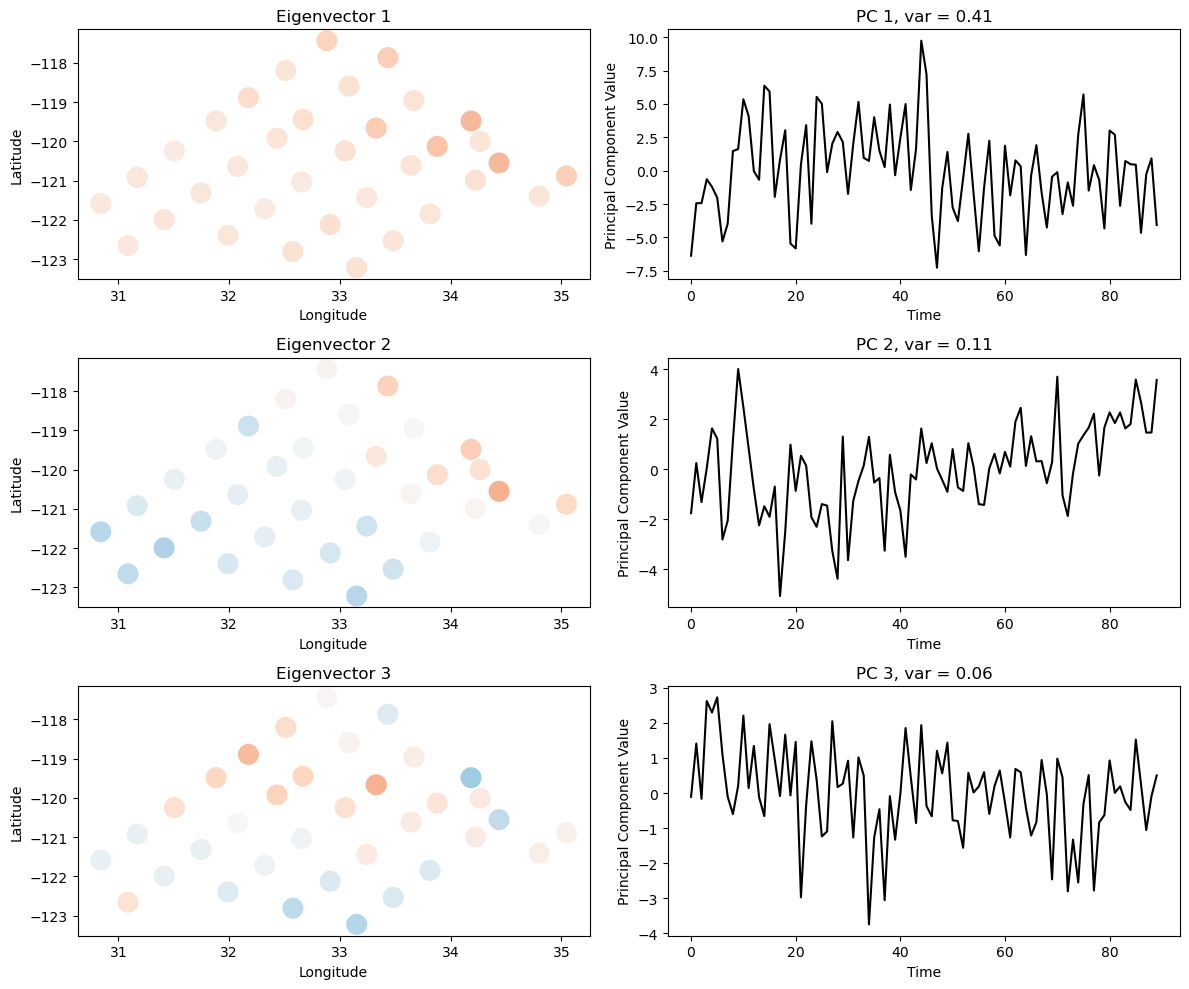

In [263]:
plt.figure(figsize=(12, 10))  # Adjust the size as needed

for i in range(3):
    plt.subplot(3, 2, i * 2 + 1)
    plt.scatter(Lat, Lon, c=eigvecs[i], s=200, cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title(f"Eigenvector {i + 1}")
    #plt.colorbar(label='Eigenvector Value')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.subplot(3, 2, i * 2 + 2)
    plt.plot(PCs[:, i], c="k")
    plt.title(f"PC {i + 1}, var = {round(FracVar[i], 2)}")
    plt.xlabel("Time")
    plt.ylabel("Principal Component Value")

plt.tight_layout()
plt.show()